## 1. Setup data

In [1]:
import pandas as pd
import numpy as np
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
cols = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

df = pd.read_csv(url, header=None, names=cols)
# df["income"]=df["income"].apply(lambda x: 0 if x=="<=50k" else 1)
# df["test"].astype() // pd.to_datetime()
# df["cat_feature"].astype("category")
# num_cols = df.select_dtypes(include=["int64","float64"]).columns
# cat_cols = df.select_dtypes(include=["object","category"]).columns
# df.describe
# df.isnull().sum()
target_feature = "income"
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
# SMOTE if necessary: 
from imblearn.over_sampling import SMOTE


#!pip install imbalanced-learn
X=df[["age","fnlwgt","income"]].drop(columns=["income"])
y = df["income"]
smote = SMOTE(random_state=123, sampling_strategy={' >50K':10000,' <=50K':30000})#sampling_strategy=0.5
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled["income"] = y_resampled
X_resampled["income"].value_counts()
#df_resampled = pd.
#print("Resampled class distribution:", Counter(df_resampled['target']))

income
<=50K    30000
>50K     10000
Name: count, dtype: int64

## 2. EDA

In [1]:
# classification problem


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


target_feature = "income"

print(df.info())
print("\n missing values:\n", df.isnull().sum())
print("\n summary statistics :\n", df.describe())

# target distribution
print("\n target distribution:\n", df[target_feature].value_counts(normalize=True))
sns.countplot(x=target_feature, data=df)
plt.title("Target Distribution")
plt.show()





categorical_features = ["workclass","education-num","marital-status","occupation","relationship","race","sex"]  # ["sex","thal","ca","slope","exang","restecg","fbs","cp"]
numerical_features = ["age","fnlwgt","capital-gain","hours-per-week"]    # ['age', 'chol', 'oldpeak', 'thalach', 'trestbps']

# numerical features
# univariate analysis

for feat_num in numerical_features:
    feature = df[feat_num]
    print(f"\nFeature: {feat_num}")
    print("Summary:")
    print("Number of data points:", len(feature))
    print(feature.describe())
    #print(f"Missing: {feature.isna().sum()}, Unique: {feature.nunique()}")
    print("Missing values:", feature.isnull().sum(), "Missing percentage: {:.2f}%".format(feature.isnull().mean() * 100))
    print("Unique values:", feature.nunique(), "Unique percentage: {:.2f}%".format(feature.nunique() / len(df) * 100))
    print("Minimum value:", feature.min())
    print("Maximum value:", feature.max())
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))

    # histogram
    sns.histplot(feature, ax=axes[0], kde=True, bins=30)
    axes[0].set_title(f"Histogram of {feat_num}")

    # boxplott
    sns.boxplot(y=feature, ax=axes[1], color='lightcoral')
    axes[1].set_title(f"Boxplot of {feat_num}")

    # boxplot by target (less than 10 classes)
    if target_feature in df.columns and df[target_feature].nunique() <= 10:
        sns.boxplot(x=target_feature, y=feat_num, data=df, ax=axes[2])
        axes[2].set_title(f"{feat_num} by Target")

    plt.tight_layout()
    plt.show()

# categorical Features
# univariate

for feat_cat in categorical_features:
    feature = df[feat_cat]
    print(f"\n feature: {feat_cat}")
    print("value counts:")
    print(feature.value_counts(dropna=False))

    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # countplot
    sns.countplot(x=feat_cat, data=df, ax=axes[0])
    axes[0].set_title(f"countplot of {feat_cat}")
    axes[0].tick_params(axis='x', rotation=45)

    # boxplot of target by category
    if target_feature in df.columns :
      sns.countplot(x=feat_cat, hue=target_feature, data=df, ax=axes[1], palette='Set2')
      axes[1].set_title(f"{feat_cat} grouped by Target")

    plt.tight_layout()
    plt.show()


# correlation analysis
if len(numerical_features) > 1:
    plt.figure(figsize=(12, 8))
    sns.heatmap(df[numerical_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()


# Bivariate analysis

# pairplot (num-num)

numerical_features_pairplot = numerical_features

if len(numerical_features_pairplot) <= 10:  # limit for visual clarity
    sns.pairplot(df[numerical_features_pairplot + [target_feature]] if target_feature in df.columns else df[numerical_features_pairplot],
                 hue= target_feature if target_feature in df.columns else None,
                 palette='husl')
    plt.show()

NameError: name 'df' is not defined

## 3. Preprocessing

In [121]:
df_copy = df.copy()

In [122]:
df_copy['income'] = df_copy["income"].map({" <=50K":0, " >50K":1}).astype(int)

### 3.1 Drop irrelevant columns and duplicates

In [123]:
df_copy = df_copy[df_copy["native-country"] == " United-States"]
df_copy = df_copy.drop(columns = ["education", "occupation", "workclass","native-country"])
df_copy.shape

# check duplicates
duplicates = df_copy.duplicated()
print("\nNumber of duplicate rows:", duplicates.sum())
# remove duplicates
df_copy = df_copy[~duplicates]
df_copy.reset_index(drop=True, inplace=True)


Number of duplicate rows: 81


### 3.2 Missing values patterns / Imputation strategy  

In [ ]:
# how to handle missing values
# Fill missing values for numerical features with median or median // categorical features with mode-most frequent value -> SimpleImputer
# from sklearn.impute import SimpleImputer
# img_num = SimpleImputer(missing_values=np.nan|"", strategy='mean'|'median'|'most_frequent')
# imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
# ignore missing values (whole column or few rows) if they are not significant (value_counts insignificant)

#df[feat].fillna(df[feat].mode()[0], inplace=True)  # fill with mode for categorical features
#df[numerical_features].fillna(df[numerical_features].median(), inplace=True)  # fill with median for numerical features


#df[feat]= df[feat].replace(" ?", np.nan)  # replace " ?" with NaN


### 3.3 Outlier detection and treatment strategy 

In [124]:
# ignore last quantile of numerical features if relevant  // we could also use z-score or IQR to remove outliers 


df_copy = df_copy[
    (df_copy["capital-gain"] < df_copy["capital-gain"].quantile(0.98)) 
    # & (df_copy["capital-gain"] > df_copy["capital-gain"].quantile(0.2))
]
df_copy = df_copy.reset_index(drop=True)


### 3.4 Encoding

In [125]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder
from sklearn.preprocessing import LabelEncoder # to encode target variable in multiclass classification

col_to_encode = ["race","sex"]
encoder = OneHotEncoder(drop='if_binary' ,handle_unknown='ignore', sparse_output=False)
encoded = encoder.fit_transform(df_copy[col_to_encode])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(col_to_encode))
df_copy = pd.concat([df_copy.drop(columns=col_to_encode), encoded_df], axis=1)


# or we can use OrdinalEncoder for ordinal categorical features (1 by 1) // meaningful order

custom_order = [[' Wife', ' Husband', ' Not-in-family', ' Own-child', ' Other-relative', ' Unmarried']]
ordinal_encoder = OrdinalEncoder(categories=custom_order)
encoded = ordinal_encoder.fit_transform(df[['relationship']])
df_copy['relationship_encoded'] = ordinal_encoder.fit_transform(df_copy[['relationship']])
df_copy = df_copy.drop(columns=['relationship'])


# in case of high cardinality, we can use target encoding (data leakage is a risk)

target_encoder = TargetEncoder()
df_copy['marital-status_encoded'] = target_encoder.fit(df_copy[['marital-status']], df_copy[target_feature]).transform(df_copy[['marital-status']])
df_copy = df_copy.drop(columns=['marital-status'])


### 3.5 Scaling

In [126]:
# scale numerical features 
from sklearn.preprocessing import StandardScaler, MinMaxScaler #  normalization, 0-1 scaling
cols_scale = ["fnlwgt", "capital-gain"]
scaler = StandardScaler()
df_copy[cols_scale] = scaler.fit_transform(df_copy[cols_scale])

### 3.6 feature creation / transformation

In [ ]:
# it's usually better to have numerical features normaly distributed, so we can apply log transformation if needed

# if data is skewed to the right, we can apply log transformation -> Skewed to the right -> .apply(lambda x: np.log(x+1))  

## 4. Model selection and Evaluation

### 4.1 Split data / Cross validation


In [127]:
# classic train test split
from sklearn.model_selection import train_test_split




X_train, X_test, y_train, y_test = train_test_split(
    df_copy.drop(columns=[target_feature]), 
    df_copy[target_feature], 
    test_size=0.2, 
    random_state=123, 
    stratify=df_copy[target_feature] if target_feature in df_copy.columns else None
)



# from sklearn.model_selection import StratifiedKFold # for stratified k-fold cross-validation

# Define stratified k-fold with 5 splits
#skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # simple cross_validation

# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1', n_jobs=-1)
# print(f"Mean F1 Score (CV): {scores.mean():.4f} ± {scores.std():.4f}")

# # gridSearchCV
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     "classifier__n_estimators": [100, 200],
#     "classifier__max_depth": [None, 10, 20],
#     "classifier__min_samples_split": [2, 5]
# }

# grid_search = GridSearchCV(
#     estimator=pipeline,
#     param_grid=param_grid,
#     cv=5,
#     scoring='f1',
#     n_jobs=-1,
#     verbose=1,
#     return_train_score=True
# )

# grid_search.fit(X_train, y_train)

# print("Best params:", grid_search.best_params_)
# print("Best CV F1 Score:", grid_search.best_score_)


# define a custom scoring function
#from sklearn.metrics import make_scorer, fbeta_score

#f3_scorer = make_scorer(fbeta_score, beta=3) # , average='macro' if multiclass classification
# use f3_scorer in cross-validation or grid search 
# scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=f3_scorer, n_jobs=-1)
# grid_search = GridSearchCV(estimator=pipeline,aram_grid=param_grid,scoring=f3_scorer,cv=5,n_jobs=-1,verbose=1)


# from sklearn.model_selection import cross_validate

# cv_results = cross_validate(
#     pipeline, X, y,
#     cv=5,
#     scoring={
#         'accuracy': 'accuracy',
#         'precision': 'precision',
#         'recall': 'recall',
#         'f1': 'f1',
#         'roc_auc': 'roc_auc'
#     },
#     return_train_score=True,
#     n_jobs=-1
# )

# for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc']:
#     print(f"{metric}: {cv_results[metric].mean():.4f} ± {cv_results[metric].std():.4f}")


### 4.2 Evaluation Metrics

In [106]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    fbeta_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# # Make predictions
# y_pred = model.predict(X_test)
# y_proba = model.predict_proba(X_test)

# evaluation metrics
def evaluate_model_custom(y_test, y_pred, y_proba):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f_beta = fbeta_score(y_test, y_pred, beta=2)  # β < 1 (e.g., 0.5): Prioritize precision // β > 1 prioritize recall

    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"F2 Score:  {f_beta:.4f}")  # F2 favors recall more than precision

    # # Classification Report
    #print("\nClassification Report:")
    #print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC-AUC
    # test if y_proba is available
    if y_proba is not None and len(np.unique(y_test)) == 2:  # binary classification
        auc = roc_auc_score(y_test, y_proba)
        print(f"ROC-AUC Score: {auc:.4f}")
    # # Plot ROC Curve
    # fpr, tpr, _ = roc_curve(y_test, y_proba)
    # plt.figure(figsize=(6, 4))
    # plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    # plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    # plt.title("ROC Curve")
    # plt.xlabel("False Positive Rate")
    # plt.ylabel("True Positive Rate")
    # plt.legend()
    # plt.show()


    # for multiclass 
    if len(np.unique(y_test)) > 2:
        f_beta = fbeta_score(y_test, y_pred, beta=2, average='macro')
        # roc : one vs rest 
        try:
            auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
            print(f"ROC-AUC Score (OvR): {auc:.4f}")
        except Exception as e:
            print(f"ROC-AUC not computed: {e}")


### 4.2 Model testing


Training Logistic Regression...
Logistic Regression trained successfully.
y_proba : [0.2589446  0.19068808 0.00239171 ... 0.34305655 0.3777373  0.02859149]
Accuracy: 0.8421
Precision: 0.7162
Recall:    0.5187
F1 Score:  0.6017
F2 Score:  0.5490


c:\Users\Ad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


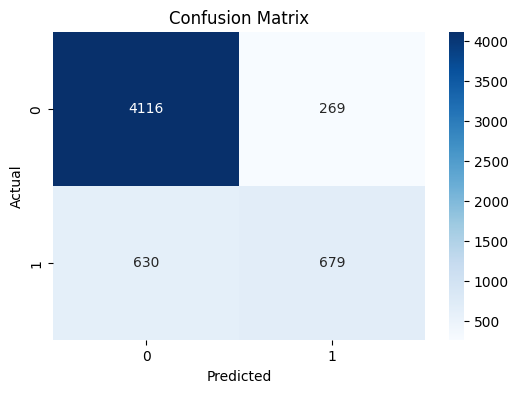

ROC-AUC Score: 0.8829
Logistic Regression evaluation completed.


Training Random Forest...
Random Forest trained successfully.
y_proba : [0.09 0.28 0.   ... 0.18 0.42 0.  ]
Accuracy: 0.8453
Precision: 0.6931
Recall:    0.5867
F1 Score:  0.6355
F2 Score:  0.6053


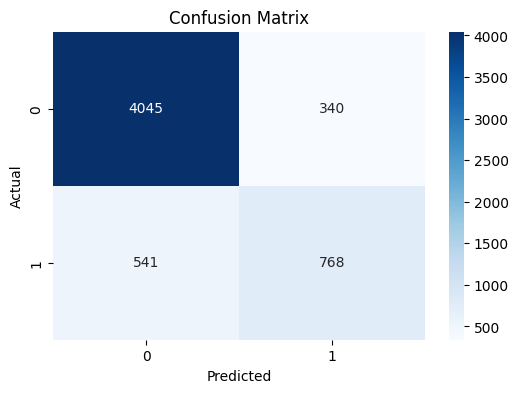

ROC-AUC Score: 0.8932
Random Forest evaluation completed.


Training SVM...
SVM trained successfully.
y_proba : [0.21230004 0.21035371 0.20162954 ... 0.21568141 0.21372634 0.20101385]
Accuracy: 0.7833
Precision: 0.7193
Recall:    0.0940
F1 Score:  0.1662
F2 Score:  0.1137


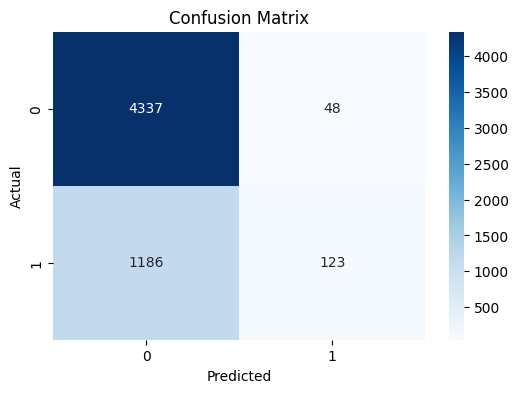

ROC-AUC Score: 0.8664
SVM evaluation completed.


Training KNN...
KNN trained successfully.
y_proba : [0.  0.  0.  ... 0.4 0.6 0. ]
Accuracy: 0.8326
Precision: 0.6564
Recall:    0.5707
F1 Score:  0.6105
F2 Score:  0.5860


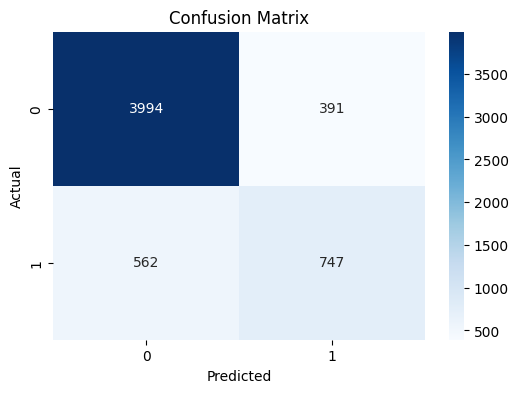

ROC-AUC Score: 0.8518
KNN evaluation completed.


Training XGBoost...
XGBoost trained successfully.
y_proba : [2.71814704e-01 1.90459743e-01 4.61682864e-03 ... 3.72752130e-01
 6.81102276e-01 1.04460065e-04]
Accuracy: 0.8651
Precision: 0.7439
Recall:    0.6303
F1 Score:  0.6824
F2 Score:  0.6501


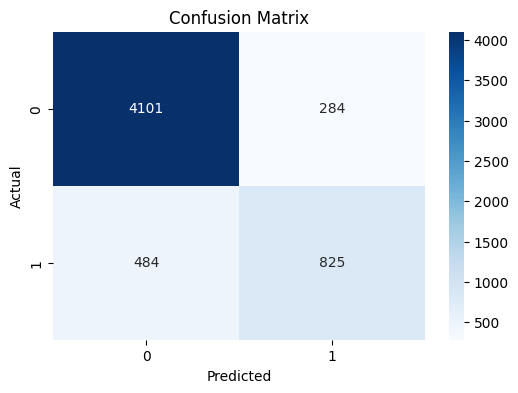

ROC-AUC Score: 0.9199
XGBoost evaluation completed.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


models = {
    'Logistic Regression': LogisticRegression(random_state=123), # LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000), # C to reduce overfitting
    #'Random Forest': RandomForestClassifier(random_state=123), # n_estimators, max_depth, min_samples_split, min_samples_leaf to reduce overfitting // class_weight='balanced' if imbalanced dataset or class_weight={0: 1, 1: 10} otherwise
    #'SVM': SVC(random_state=123, probability=True),
    #'KNN': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': XGBClassifier(random_state=123, use_label_encoder=False, eval_metric='logloss'), # eval_metric='logloss' or 'mlogloss' for multiclass # learning_rate  // n_estimators  // max_depth // max_leaves to reduce overfitting
}

X_train, X_test, y_train, y_test = train_test_split(
    df_copy.drop(columns=[target_feature]), 
    df_copy[target_feature], 
    test_size=0.2, 
    random_state=123, 
    stratify=df_copy[target_feature] if target_feature in df_copy.columns else None
)

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    print(f"{model_name} trained successfully.")
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    print("y_proba :",y_proba)
    evaluate_model_custom( y_test, y_pred, y_proba)
    print(f"{model_name} evaluation completed.\n")
    print("=" * 50)
    
    

## 5. Interpretability

In [129]:
!pip install shapiq


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [132]:
from xgboost import XGBClassifier
import shapiq
clf = XGBClassifier(random_state=123, use_label_encoder=False, eval_metric='logloss') # eval_metric='logloss' or 'mlogloss' for multiclass # learning_rate  // n_estimators  // max_depth // max_leaves to reduce overfitting

clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, 'predict_proba') else None

# Shapiq

explainer_tabular = shapiq.TabularExplainer(model=clf, data=np.array(X_train), index="SII", max_order=2)



# correlation does not impy causation // confouding variables problem

In [139]:
X_test.iloc[0:2]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,relationship_encoded,marital-status_encoded
27569,40,1.186015,9,-0.233321,0,40,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.438119
12027,35,-0.893756,9,-0.233321,0,40,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.438119


In [ ]:
explainer_tabular.explain(X_test.iloc[0:2])




# ADD partial dependence plots // xgboost feature importance 

# F:\Ekimetrics\my personal files eki\WebScrapBook\data\Shapiq interaction

ValueError: could not broadcast input array from shape (32768,) into shape (16384,)

## 6. Production Pipeline

Accuracy: 0.8447
Precision: 0.7050
Recall:    0.6332
F1 Score:  0.6672
F2 Score:  0.6464


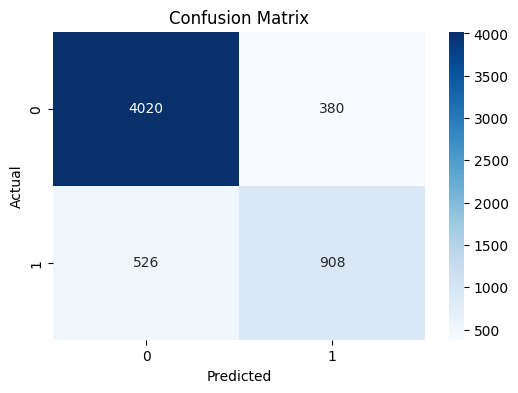

ROC-AUC Score: 0.8973


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer

from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier

# Features
numerical_features = ["fnlwgt", "capital-gain"]
ordinal_features = ["relationship"]
nominal_features = ["race", "sex","marital-status"]
high_card_features = []



# Transformers
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

ordinal_transformer = Pipeline(steps=[
    ("ordinal", OrdinalEncoder(categories=[[' Wife', ' Husband', ' Not-in-family', ' Own-child', ' Other-relative', ' Unmarried']]))
])

nominal_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])




# Combine all preprocessing
preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, numerical_features),
    ("ord", ordinal_transformer, ordinal_features),
    ("nom", nominal_transformer, nominal_features),
], remainder="passthrough")  # 'drop' in case all columns are transformed

# Final model pipeline
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))  # classifier
])

df_copy = df.copy()

df_copy = df_copy[df_copy["native-country"] == " United-States"]
df_copy = df_copy.reset_index(drop=True)
df_copy = df_copy.drop(columns=["education", "occupation", "workclass", "native-country"])
df_copy['income'] = df_copy["income"].map({" <=50K": 0, " >50K": 1}).astype(int)



# Target
feature_target = "income"


X_train, X_test, y_train, y_test = train_test_split(
    df_copy.drop(columns=[feature_target]), 
    df_copy[feature_target], 
    test_size=0.2, 
    random_state=123, 
    stratify=df_copy[feature_target] if feature_target in df.columns else None
)



# Fit the pipeline
pipeline.fit(X_train, y_train)
# Evaluate the pipeline
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, 'predict_proba') else None

evaluate_model_custom(y_test, y_pred,y_proba)

In [ ]:
# # claude
# import pandas as pd
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer
# from sklearn.impute import SimpleImputer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.base import BaseEstimator, TransformerMixin

# # Custom transformer for data cleaning and filtering
# class DataCleaningTransformer(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         self.reset_index = True
    
#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X):
#         df_copy = X.copy()
        
#         # Filter for US residents only
#         if "native-country" in df_copy.columns:
#             df_copy = df_copy[df_copy["native-country"] == " United-States"]
        
#         # Drop specified columns
#         columns_to_drop = ["education", "occupation", "workclass", "native-country"]
#         existing_columns_to_drop = [col for col in columns_to_drop if col in df_copy.columns]
#         if existing_columns_to_drop:
#             df_copy = df_copy.drop(columns=existing_columns_to_drop)
        
#         # Remove duplicates
#         duplicates = df_copy.duplicated()
#         df_copy = df_copy[~duplicates]
#         df_copy = df_copy.reset_index(drop=True)
        
#         return df_copy

# # Custom transformer for outlier removal
# class OutlierRemovalTransformer(BaseEstimator, TransformerMixin):
#     def __init__(self, numerical_features=None, quantile_threshold=0.98):
#         self.numerical_features = numerical_features or []
#         self.quantile_threshold = quantile_threshold
#         self.quantile_values_ = {}
    
#     def fit(self, X, y=None):
#         df = X.copy()
#         # Store quantile values for each numerical feature
#         for feature in self.numerical_features:
#             if feature in df.columns:
#                 self.quantile_values_[feature] = df[feature].quantile(self.quantile_threshold)
#         return self
    
#     def transform(self, X):
#         df_copy = X.copy()
        
#         # Apply outlier removal based on fitted quantiles
#         for feature, threshold in self.quantile_values_.items():
#             if feature in df_copy.columns:
#                 df_copy = df_copy[df_copy[feature] < threshold]
        
#         df_copy = df_copy.reset_index(drop=True)
#         return df_copy

# # Custom transformer for target mapping (only for training data with target)
# class TargetMappingTransformer(BaseEstimator, TransformerMixin):
#     def __init__(self, target_column="income"):
#         self.target_column = target_column
    
#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X):
#         df_copy = X.copy()
#         if self.target_column in df_copy.columns:
#             df_copy[self.target_column] = df_copy[self.target_column].map({
#                 " <=50K": 0, 
#                 " >50K": 1
#             }).astype(int)
#         return df_copy

# # Features
# numerical_features = ["fnlwgt", "capital-gain"]
# ordinal_features = ["relationship"]
# nominal_features = ["race", "sex", "marital-status"]
# target_feature = "income"

# # Initialize transformers
# data_cleaner = DataCleaningTransformer()
# outlier_remover = OutlierRemovalTransformer(numerical_features=numerical_features)
# target_mapper = TargetMappingTransformer(target_column=target_feature)

# # Feature preprocessing transformers
# num_transformer = Pipeline(steps=[
#     ("imputer", SimpleImputer(strategy="median")),
#     ("scaler", StandardScaler())
# ])

# ordinal_transformer = Pipeline(steps=[
#     ("imputer", SimpleImputer(strategy="most_frequent")),  # Add imputation for ordinal
#     ("ordinal", OrdinalEncoder(
#         categories=[[' Wife', ' Husband', ' Not-in-family', ' Own-child', ' Other-relative', ' Unmarried']],
#         handle_unknown='use_encoded_value',
#         unknown_value=-1
#     ))
# ])

# nominal_transformer = Pipeline(steps=[
#     ("imputer", SimpleImputer(strategy="most_frequent")),  # Add imputation for nominal
#     ("onehot", OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
# ])

# # Feature preprocessing only (without target transformation)
# feature_preprocessor = ColumnTransformer(transformers=[
#     ("num", num_transformer, numerical_features),
#     ("ord", ordinal_transformer, ordinal_features),
#     ("nom", nominal_transformer, nominal_features)
# ], remainder="drop")

# # Complete preprocessing pipeline (for training data with target)
# def create_full_preprocessing_pipeline():
#     return Pipeline(steps=[
#         ("data_cleaning", data_cleaner),
#         ("outlier_removal", outlier_remover),
#         ("target_mapping", target_mapper)
#     ])

# # Feature-only preprocessing pipeline (for prediction)
# def create_feature_preprocessing_pipeline():
#     return Pipeline(steps=[
#         ("data_cleaning", data_cleaner),
#         ("feature_preprocessing", feature_preprocessor)
#     ])

# # Example usage:
# def train_model(df):
#     """
#     Train the model with proper preprocessing
#     """
#     # Apply initial preprocessing to the full dataset
#     preprocessing_pipeline = create_full_preprocessing_pipeline()
#     df_processed = preprocessing_pipeline.fit_transform(df)
    
#     # Split the data
#     X = df_processed.drop(columns=[target_feature])
#     y = df_processed[target_feature]
    
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y,
#         test_size=0.2,
#         random_state=123,
#         stratify=y
#     )
    
#     # Create final model pipeline (only feature preprocessing for X data)
#     model_pipeline = Pipeline(steps=[
#         ("feature_preprocessing", feature_preprocessor),
#         ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
#     ])
    
#     # Fit the model
#     model_pipeline.fit(X_train, y_train)
    
#     # Make predictions
#     y_pred = model_pipeline.predict(X_test)
    
#     return model_pipeline, X_test, y_test, y_pred

# # Alternative approach: Single pipeline for everything (more complex but integrated)
# def create_integrated_pipeline():
#     """
#     Creates a single pipeline that handles everything
#     Note: This approach requires careful handling of the target variable
#     """
    
#     class IntegratedPreprocessor(BaseEstimator, TransformerMixin):
#         def __init__(self):
#             self.data_cleaner = DataCleaningTransformer()
#             self.outlier_remover = OutlierRemovalTransformer(numerical_features=numerical_features)
#             self.feature_preprocessor = feature_preprocessor
#             self.fitted = False
        
#         def fit(self, X, y=None):
#             # Combine X and y for preprocessing steps that need both
#             df_combined = X.copy()
#             if y is not None:
#                 df_combined[target_feature] = y
            
#             # Fit preprocessing steps
#             df_combined = self.data_cleaner.fit_transform(df_combined)
#             df_combined = self.outlier_remover.fit_transform(df_combined)
            
#             # Separate features for fitting feature preprocessor
#             X_features = df_combined.drop(columns=[target_feature] if target_feature in df_combined.columns else [])
#             self.feature_preprocessor.fit(X_features)
            
#             self.fitted = True
#             return self
        
#         def transform(self, X):
#             if not self.fitted:
#                 raise ValueError("Transformer must be fitted before transform")
            
#             # For prediction, we only have X (no target)
#             df_processed = self.data_cleaner.transform(X)
#             # Note: Outlier removal should be carefully handled during prediction
#             # You might want to skip it or use fitted thresholds differently
            
#             return self.feature_preprocessor.transform(df_processed)
    
#     return Pipeline(steps=[
#         ("integrated_preprocessing", IntegratedPreprocessor()),
#         ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
#     ])

# # Usage example with error handling
# def safe_train_model(df):
#     """
#     Train model with error handling
#     """
#     try:
#         return train_model(df)
#     except Exception as e:
#         print(f"Error during training: {e}")
#         print("Please check that your dataframe has the required columns:")
#         print(f"Required: {numerical_features + ordinal_features + nominal_features + [target_feature]}")
#         print(f"Available: {list(df.columns) if 'df' in locals() else 'DataFrame not available'}")
#         raise

## 7.  Save // Drift // Deployment // Reporting

In [ ]:
import joblib
joblib.dump(pipeline, "pipeline_model.pkl")  # either save the whole pipeline or just the model
# To load the model later
loaded_pipeline = joblib.load("pipeline_model.pkl")
# Make predictions with the loaded model
target = "income"
df_copy = df.copy()

# TODO this part should be integrated into the pipeline
"""
df_copy = df_copy[df_copy["native-country"] == " United-States"]
df_copy = df_copy.reset_index(drop=True)
df_copy = df_copy.drop(columns=["education", "occupation", "workclass", "native-country"])
df_copy['income'] = df_copy["income"].map({" <=50K": 0, " >50K": 1}).astype(int)
"""



X_test = df_copy.drop(columns=[target])
y_test = df_copy[target]
y_pred = loaded_pipeline.predict(X_test)
y_proba = loaded_pipeline.predict_proba(X_test)[:, 1] if hasattr(loaded_pipeline, 'predict_proba') else None
evaluate_model_custom(y_test, y_pred, y_proba)

### predict new data

### Drift

In [ ]:
# Kolmogorov-Smirnov (K-S) test ( for distribution comparison) // changes in distrubution of input features over time
# prior probability distribution shift of the target variable  // corona virus became more common // P(Y) changed but P(X|Y) didn't change
# concept drift // relationship between input features and target variable changed over time // less correlation or 

# performance degradation over time
